# OPEN/CLOSE thory 
#### What is the OPEN CLOSE THEORY 
- The OPEN CLOSE theory takes a data set that has been show to have a high (85-95%) predictive capability on a certain target. THe challenge of Forecasting the next day of of a highly volatile featue could be combatted using this theory. 
- For Example , Stock Prices - Traiing an testing on past data as well as predicting the value of a target is great be there is no value to an investor. Being, THere is no way to invest in tomorrw. 
- The Open close considers this and Trains on data for the Adjustable Close for List of features and tried to prdict the OPEN of the Target. What this does to gives the investor the ability to look at the OPEN Prediction for a stock based off the trained Adj Close Features
- This will be pur approach for this prject

In [345]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_datareader import data as web

In [346]:
import matplotlib.pyplot as plt

## Importing Data
- Will remove the value of of VIX in this dta set since it is a representation of and Adj Close Value for the index
- Will import using pandas_datareader the Open data and concatinate into the data set

In [347]:
data = pd.read_csv("resources/vix_data_cleaned", index_col="dates", parse_dates = True)

In [348]:
data.replace([np.inf, -np.inf], np.nan, inplace = True)

In [349]:
data.dropna()

,UVXY,SPY,VXXBEN,VIX,UX1,UX2,UX3,UX4,Day of Week,Days to Roll,...,UX1 % returns,UX2 % returns,UX3 % returns,UX4 % returns,UVXY % returns,SPY % returns,VXXBEN % returns,VIX % returns,regression Slope,Inverse Slope
dates,,,,,,,,,,,,,,,,,,,,,
2006-11-15,6.893194e+09,140.02,2.3300,10.31,11.620,12.350,12.930,13.540,3,24,...,0.133659,0.053754,0.031100,0.036753,-0.016788,0.002865,5.472222,-0.018095,0.777,-0.777
2006-11-16,6.846782e+09,140.38,2.4850,10.16,11.580,12.290,12.900,13.380,4,23,...,-0.003442,-0.004858,-0.002320,-0.011817,-0.006733,0.002571,0.066524,-0.014549,0.776,-0.776
2006-11-17,6.948684e+09,140.42,2.7550,10.05,11.670,12.320,12.940,13.440,5,22,...,0.007772,0.002441,0.003101,0.004484,0.014883,0.000285,0.108652,-0.010827,0.805,-0.805
2006-11-20,6.712020e+09,140.50,2.6550,9.97,11.430,12.360,13.090,13.430,1,21,...,-0.020566,0.003247,0.011592,-0.000744,-0.034059,0.000570,-0.036298,-0.007960,0.858,-0.858
2006-11-21,6.804641e+09,140.64,2.8900,9.90,11.500,12.480,13.310,13.500,2,20,...,0.006124,0.009709,0.016807,0.005212,0.013799,0.000996,0.088512,-0.007021,0.901,-0.901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-10,2.730000e+01,298.13,2.2625,15.20,16.225,17.675,18.025,17.875,2,5,...,-0.012177,0.000000,0.002782,0.005626,-0.004739,-0.000235,-0.040297,-0.004584,0.715,-0.715
2019-09-11,2.661000e+01,300.25,2.4725,14.61,15.725,17.325,17.825,17.725,3,4,...,-0.030817,-0.019802,-0.011096,-0.008392,-0.025275,0.007111,0.092818,-0.038816,0.833,-0.833
2019-09-12,2.565000e+01,301.29,2.1575,14.22,14.975,17.025,17.625,17.575,4,3,...,-0.047695,-0.017316,-0.011220,-0.008463,-0.036077,0.003464,-0.127401,-0.026694,0.936,-0.936


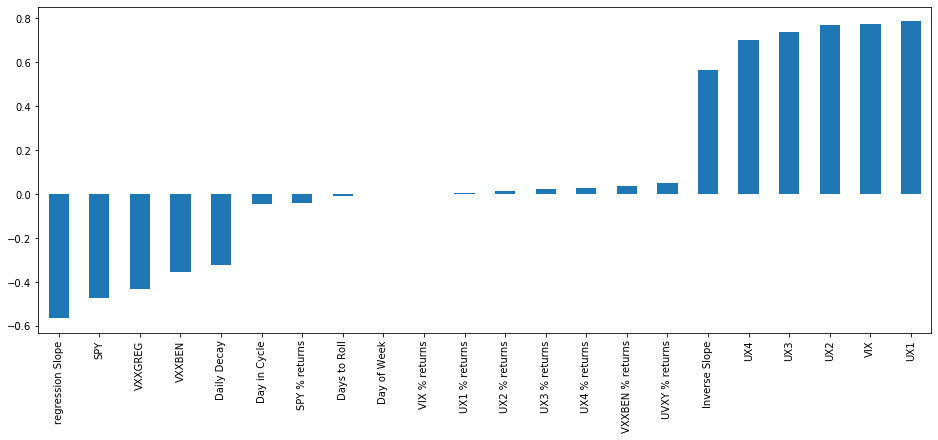

In [350]:
data.corr()["UVXY"].sort_values()[:-1].plot(kind = "bar", figsize = (16,6))

In [351]:
data.columns

Index(['UVXY', 'SPY', 'VXXBEN', 'VIX', 'UX1', 'UX2', 'UX3', 'UX4',
       'Day of Week', 'Days to Roll', 'Day in Cycle', 'Daily Decay', 'VXXGREG',
       'UX1 % returns', 'UX2 % returns', 'UX3 % returns', 'UX4 % returns',
       'UVXY % returns', 'SPY % returns', 'VXXBEN % returns', 'VIX % returns',
       'regression Slope', 'Inverse Slope'],
      dtype='object')

In [352]:
data.drop(["VIX", "VIX % returns"], axis=1, inplace=True)

In [353]:
data.columns

Index(['UVXY', 'SPY', 'VXXBEN', 'UX1', 'UX2', 'UX3', 'UX4', 'Day of Week',
       'Days to Roll', 'Day in Cycle', 'Daily Decay', 'VXXGREG',
       'UX1 % returns', 'UX2 % returns', 'UX3 % returns', 'UX4 % returns',
       'UVXY % returns', 'SPY % returns', 'VXXBEN % returns',
       'regression Slope', 'Inverse Slope'],
      dtype='object')

In [354]:
vix_data = web.DataReader("^VIX", data_source="yahoo", start = "2006-10-23", end="2019-09-16")["Open"]

In [355]:
data = pd.concat([data, vix_data], axis=1)

In [356]:
data["VIX open daily returns"] = data["Open"].pct_change()

##  Open Daily Movement
- we can see that VIX open at one point at 100% up. 
- Lets find what daat this was below 

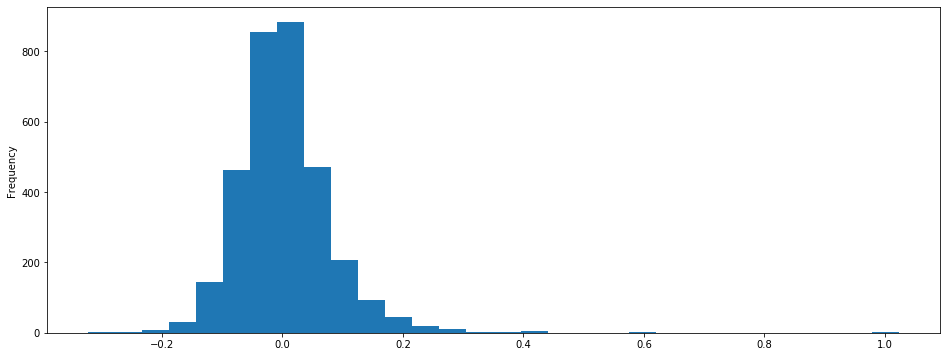

In [357]:
data["VIX open daily returns"].plot(kind = "hist", figsize = (16,6), bins = 30)

# Highest Vol
- Looks like VIX Spiked to over 100% on feb 6th 2018

In [358]:
data[data["VIX open daily returns"] > 0.8]["VIX open daily returns"]

2018-02-06    1.023861
Name: VIX open daily returns, dtype: float64

### Data Preprossing 
- LEts begin processing the data for our model
- Again our target will be the price of VIX OPEN value

In [359]:
model_data = data.dropna()

In [360]:
X = model_data.drop("Open", axis=1).values
y = model_data["Open"].values

## Train Test Split

In [361]:
from sklearn.model_selection import train_test_split

In [362]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

### Scaling the Data
- LEts scale our data to a normal distributon

In [363]:
from sklearn.preprocessing import MinMaxScaler

In [364]:
scalar = MinMaxScaler()

In [365]:
X_train = scalar.fit_transform(X_train)

In [366]:
X_test = scalar.transform(X_test)

In [367]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

### Early Stopping
- we will use early stopping to prevent over training'

In [368]:
stop = EarlyStopping(monitor="val_loss", mode="min", patience=30)

### Model Creation

In [369]:
model = Sequential()
model.add(Dense(units= 21, activation="relu"))
model.add(Dense(units= 21, activation="relu"))
model.add(Dense(units= 21, activation="relu"))
model.add(Dense(units= 21, activation="relu"))
model.add(Dense(units= 14, activation="relu"))
model.add(Dense(units= 7, activation="relu"))
model.add(Dense(units= 1))
model.compile(optimization = "adam", loss = "mse")

### Fitting model

In [370]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs= 350, callbacks=[stop])

Train on 1936 samples, validate on 1292 samples
Epoch 1/350
1936/1936 [==============================] - 2s 1ms/sample - loss: 443.8675 - val_loss: 484.4556
Epoch 2/350
1936/1936 [==============================] - 0s 217us/sample - loss: 441.2406 - val_loss: 482.0455
Epoch 3/350
1936/1936 [==============================] - 0s 219us/sample - loss: 438.9286 - val_loss: 479.6563
Epoch 4/350
1936/1936 [==============================] - 0s 216us/sample - loss: 436.6450 - val_loss: 477.2690
Epoch 5/350
1936/1936 [==============================] - 0s 217us/sample - loss: 434.3406 - val_loss: 474.8719
Epoch 6/350
1936/1936 [==============================] - 0s 219us/sample - loss: 432.0632 - val_loss: 472.5025
Epoch 7/350
1936/1936 [==============================] - 0s 217us/sample - loss: 429.8071 - val_loss: 470.1412
Epoch 8/350
1936/1936 [==============================] - 0s 218us/sample - loss: 427.5331 - val_loss: 467.7756
Epoch 9/350
1936/1936 [==============================] - 0s 215us/

Epoch 74/350
1936/1936 [==============================] - 0s 216us/sample - loss: 294.5276 - val_loss: 328.4577
Epoch 75/350
1936/1936 [==============================] - 0s 215us/sample - loss: 292.7605 - val_loss: 326.6010
Epoch 76/350
1936/1936 [==============================] - 0s 214us/sample - loss: 291.0073 - val_loss: 324.7441
Epoch 77/350
1936/1936 [==============================] - 0s 218us/sample - loss: 289.2511 - val_loss: 322.8935
Epoch 78/350
1936/1936 [==============================] - 0s 217us/sample - loss: 287.5103 - val_loss: 321.0644
Epoch 79/350
1936/1936 [==============================] - 0s 216us/sample - loss: 285.7746 - val_loss: 319.2307
Epoch 80/350
1936/1936 [==============================] - 0s 214us/sample - loss: 284.0410 - val_loss: 317.3891
Epoch 81/350
1936/1936 [==============================] - 0s 215us/sample - loss: 282.3247 - val_loss: 315.5927
Epoch 82/350
1936/1936 [==============================] - 0s 218us/sample - loss: 280.5944 - val_loss: 3

1936/1936 [==============================] - 0s 217us/sample - loss: 186.3812 - val_loss: 213.4499
Epoch 147/350
1936/1936 [==============================] - 0s 214us/sample - loss: 185.1384 - val_loss: 212.1231
Epoch 148/350
1936/1936 [==============================] - 0s 216us/sample - loss: 183.9262 - val_loss: 210.8181
Epoch 149/350
1936/1936 [==============================] - 0s 215us/sample - loss: 182.7084 - val_loss: 209.4949
Epoch 150/350
1936/1936 [==============================] - 0s 215us/sample - loss: 181.5032 - val_loss: 208.2029
Epoch 151/350
1936/1936 [==============================] - 0s 215us/sample - loss: 180.2935 - val_loss: 206.9033
Epoch 152/350
1936/1936 [==============================] - 0s 215us/sample - loss: 179.0865 - val_loss: 205.5947
Epoch 153/350
1936/1936 [==============================] - 0s 214us/sample - loss: 177.9136 - val_loss: 204.3286
Epoch 154/350
1936/1936 [==============================] - 0s 217us/sample - loss: 176.7198 - val_loss: 203.03

1936/1936 [==============================] - 0s 217us/sample - loss: 116.7249 - val_loss: 137.0305
Epoch 219/350
1936/1936 [==============================] - 0s 213us/sample - loss: 116.0317 - val_loss: 136.2560
Epoch 220/350
1936/1936 [==============================] - 0s 217us/sample - loss: 115.3385 - val_loss: 135.4671
Epoch 221/350
1936/1936 [==============================] - 0s 217us/sample - loss: 114.6646 - val_loss: 134.7012
Epoch 222/350
1936/1936 [==============================] - 0s 215us/sample - loss: 113.9933 - val_loss: 133.9208
Epoch 223/350
1936/1936 [==============================] - 0s 216us/sample - loss: 113.3115 - val_loss: 133.1596
Epoch 224/350
1936/1936 [==============================] - 0s 216us/sample - loss: 112.6461 - val_loss: 132.4101
Epoch 225/350
1936/1936 [==============================] - 0s 216us/sample - loss: 111.9963 - val_loss: 131.6594
Epoch 226/350
1936/1936 [==============================] - 0s 217us/sample - loss: 111.3516 - val_loss: 130.92

1936/1936 [==============================] - 0s 217us/sample - loss: 84.9946 - val_loss: 99.0242
Epoch 292/350
1936/1936 [==============================] - 0s 216us/sample - loss: 84.8246 - val_loss: 98.7613
Epoch 293/350
1936/1936 [==============================] - 0s 219us/sample - loss: 84.6500 - val_loss: 98.5275
Epoch 294/350
1936/1936 [==============================] - 0s 216us/sample - loss: 84.4926 - val_loss: 98.3113
Epoch 295/350
1936/1936 [==============================] - 0s 215us/sample - loss: 84.3466 - val_loss: 98.0864
Epoch 296/350
1936/1936 [==============================] - 0s 216us/sample - loss: 84.1947 - val_loss: 97.8808
Epoch 297/350
1936/1936 [==============================] - 0s 214us/sample - loss: 84.0570 - val_loss: 97.6814
Epoch 298/350
1936/1936 [==============================] - 0s 214us/sample - loss: 83.9159 - val_loss: 97.4601
Epoch 299/350
1936/1936 [==============================] - 0s 216us/sample - loss: 83.7725 - val_loss: 97.2437
Epoch 300/350
1

## Model Performance
- Graph shows our model performing very well 

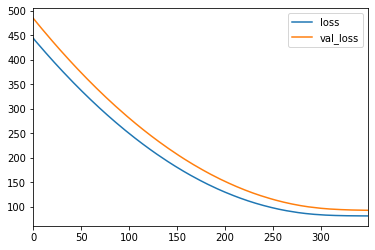

In [371]:
pd.DataFrame(model.history.history).plot()

In [372]:
predictions = model.predict(X_test)

In [373]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [374]:
print(mean_absolute_error(y_test, predictions))

6.315057220842816


In [375]:
print(mean_squared_error(y_test,predictions))

92.76788219743318


In [376]:
print(np.sqrt(mean_squared_error(y_test, predictions)))

9.631608494817113


In [377]:
print(explained_variance_score(y_test,predictions))

-9.000258360813973e-08


### lets see how out model predicts with new data 

In [378]:
from random import randint
random_index = randint(1, len(model_data))
random_item = model_data.drop("Open", axis=1).iloc[random_index]

In [379]:
X_train.shape

(1936, 22)

In [380]:
random_item.values

array([ 3.89000000e+01,  2.82480000e+02,  2.82250000e+00,  1.52250000e+01,
        1.63250000e+01,  1.66750000e+01,  1.69250000e+01,  5.00000000e+00,
        1.40000000e+01,  2.10000000e+01,  7.07860095e-03,  3.79175784e+00,
       -2.56000000e-02, -1.80451128e-02, -1.76730486e-02, -2.02604920e-02,
       -4.75024486e-02,  6.30543978e-03,  2.31188659e-01,  7.88000000e-01,
       -7.88000000e-01, -7.73732461e-02])

In [381]:
new_data = scalar.transform(random_item.values.reshape(1,22))

### Model Predicts the new data 
- Model predicts the Open will be value below for VIX 
- will confirm this value below

In [382]:
model.predict(new_data)

array([[18.753698]], dtype=float32)

### Actual Value
 -Our model showed room for training and could increase accuracy

In [383]:
model_data.iloc[random_index]["Open"]

14.1899995803833

#### Up/DOwn Classificaiton
- we will classify days that ViX was down as 1 and up as 0. This will allow us to determine if the Open Value of VIX will be up or down
-  we will need to remove the Open data because its would a perfect predictor of classificaiton
- Lets get the one hot encoding values below

In [384]:
def check_up_or_down(column):
    if column < 0:
        return 1
    else:
        return 0

In [385]:
model_data["target"] = model_data["VIX open daily returns"].apply(check_up_or_down)

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Data prep
- Will need to remove the Open and the open daily returns to prevent swaying the predicitons of the model

In [386]:
model_data

,UVXY,SPY,VXXBEN,UX1,UX2,UX3,UX4,Day of Week,Days to Roll,Day in Cycle,...,UX3 % returns,UX4 % returns,UVXY % returns,SPY % returns,VXXBEN % returns,regression Slope,Inverse Slope,Open,VIX open daily returns,target
2006-11-15,6.893194e+09,140.02,2.3300,11.620,12.350,12.930,13.540,3,24,24.0,...,0.031100,0.036753,-0.016788,0.002865,5.472222,0.777,-0.777,10.47,-0.038567,1
2006-11-16,6.846782e+09,140.38,2.4850,11.580,12.290,12.900,13.380,4,23,24.0,...,-0.002320,-0.011817,-0.006733,0.002571,0.066524,0.776,-0.776,10.13,-0.032474,1
2006-11-17,6.948684e+09,140.42,2.7550,11.670,12.320,12.940,13.440,5,22,24.0,...,0.003101,0.004484,0.014883,0.000285,0.108652,0.805,-0.805,10.37,0.023692,0
2006-11-20,6.712020e+09,140.50,2.6550,11.430,12.360,13.090,13.430,1,21,24.0,...,0.011592,-0.000744,-0.034059,0.000570,-0.036298,0.858,-0.858,10.42,0.004822,0
2006-11-21,6.804641e+09,140.64,2.8900,11.500,12.480,13.310,13.500,2,20,24.0,...,0.016807,0.005212,0.013799,0.000996,0.088512,0.901,-0.901,10.05,-0.035509,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-10,2.730000e+01,298.13,2.2625,16.225,17.675,18.025,17.875,2,5,17.0,...,0.002782,0.005626,-0.004739,-0.000235,-0.040297,0.715,-0.715,15.53,0.017693,0
2019-09-11,2.661000e+01,300.25,2.4725,15.725,17.325,17.825,17.725,3,4,17.0,...,-0.011096,-0.008392,-0.025275,0.007111,0.092818,0.833,-0.833,15.33,-0.012878,1
2019-09-12,2.565000e+01,301.29,2.1575,14.975,17.025,17.625,17.575,4,3,17.0,...,-0.011220,-0.008463,-0.036077,0.003464,-0.127401,0.936,-0.936,14.69,-0.041748,1
2019-09-13,2.511000e+01,301.09,2.3025,14.475,16.875,17.575,17.625,5,2,17.0,...,-0.002837,0.002845,-0.021053,-0.000664,0.067207,1.087,-1.087,14.16,-0.036079,1


### Setting up data for the model
- X will be our features 
- y will be all of our targets

In [387]:
X = model_data.drop(["target","VIX open daily returns"], axis=1).values
y = model_data["target"].values

### Train Testing Splitting 

In [388]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### Scale the data

In [389]:
class_scalar = MinMaxScaler()

In [390]:
X_train =class_scalar.fit_transform(X_train)

In [391]:
X_test = class_scalar.transform(X_test)

### Model Validation Data 
- will use to validate the training and testing set

In [392]:
class_stop = EarlyStopping(monitor="val_loss", mode = "min", patience=50)

## Model Creation

In [393]:
X_train.shape

(2259, 22)

In [394]:
model = Sequential()
model.add(Dense(units =100, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 75, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 60, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units =30, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 1, activation = "sigmoid"))
model.compile(loss = "binary_crossentropy", optimizer = "adam")

### Model Fitting

In [395]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=250, callbacks=[class_stop])

Train on 2259 samples, validate on 969 samples
Epoch 1/250
2259/2259 [==============================] - 3s 1ms/sample - loss: 0.7069 - val_loss: 0.6949
Epoch 2/250
2259/2259 [==============================] - 1s 458us/sample - loss: 0.6950 - val_loss: 0.6950
Epoch 3/250
2259/2259 [==============================] - 1s 457us/sample - loss: 0.6965 - val_loss: 0.6945
Epoch 4/250
2259/2259 [==============================] - 1s 458us/sample - loss: 0.6939 - val_loss: 0.6933
Epoch 5/250
2259/2259 [==============================] - 1s 459us/sample - loss: 0.6956 - val_loss: 0.6934
Epoch 6/250
2259/2259 [==============================] - 1s 457us/sample - loss: 0.6934 - val_loss: 0.6922
Epoch 7/250
2259/2259 [==============================] - 1s 460us/sample - loss: 0.6904 - val_loss: 0.6909
Epoch 8/250
2259/2259 [==============================] - 1s 454us/sample - loss: 0.6935 - val_loss: 0.6908
Epoch 9/250
2259/2259 [==============================] - 1s 462us/sample - loss: 0.6928 - val_loss:

2259/2259 [==============================] - 1s 457us/sample - loss: 0.6684 - val_loss: 0.6656
Epoch 77/250
2259/2259 [==============================] - 1s 450us/sample - loss: 0.6690 - val_loss: 0.6642
Epoch 78/250
2259/2259 [==============================] - 1s 450us/sample - loss: 0.6680 - val_loss: 0.6644
Epoch 79/250
2259/2259 [==============================] - 1s 449us/sample - loss: 0.6697 - val_loss: 0.6667
Epoch 80/250
2259/2259 [==============================] - 1s 453us/sample - loss: 0.6683 - val_loss: 0.6650
Epoch 81/250
2259/2259 [==============================] - 1s 452us/sample - loss: 0.6688 - val_loss: 0.6612
Epoch 82/250
2259/2259 [==============================] - 1s 451us/sample - loss: 0.6668 - val_loss: 0.6633
Epoch 83/250
2259/2259 [==============================] - 1s 458us/sample - loss: 0.6635 - val_loss: 0.6619
Epoch 84/250
2259/2259 [==============================] - 1s 461us/sample - loss: 0.6669 - val_loss: 0.6653
Epoch 85/250
2259/2259 [=================

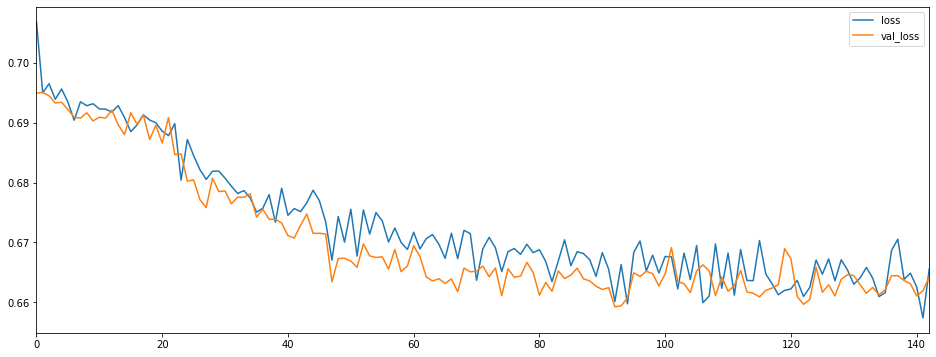

In [396]:
pd.DataFrame(model.history.history).plot(figsize = (16,6))

### Model Predictions

In [397]:
predictions = model.predict_classes(X_test)

### Metrics 
- We will use a confusion matrix and a classification matrix to view our predictions

In [398]:
from sklearn.metrics import confusion_matrix,classification_report

In [399]:
print(confusion_matrix(y_test, predictions))

[[253 194]
 [167 355]]


In [400]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.60      0.57      0.58       447
           1       0.65      0.68      0.66       522

    accuracy                           0.63       969
   macro avg       0.62      0.62      0.62       969
weighted avg       0.63      0.63      0.63       969

